## Chapter6

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import (ensemble, preprocessing, tree)
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from yellowbrick.classifier import(ConfusionMatrix, ROCAUC)
from yellowbrick.model_selection import (LearningCurve)

## Gather Data

In [3]:
url = ("titanic3.xls")

In [13]:
df = pd.read_excel(url)
orig_df = df
X = df.drop(columns='survived')
y = df['survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Introduction
- before creating a model, it is better to a some exploratory data analysis
- this helps us understand the data and we can use the results to discuss issues with the clients or business units that control the data

In [5]:
df.iloc[[1,4],-3:]

,boat,body,home.dest
1,11,NaN,"Montreal, PQ / Chesterville, ON"
4,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
df.loc[[677,864], 'sex':]

,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
677,male,26.0,0,0,349224,7.8958,NaN,S,NaN,NaN,"Bulgaria Chicago, IL"
864,female,28.0,0,0,347086,7.7750,NaN,S,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

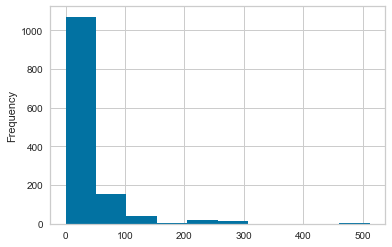

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
df.fare.plot(kind='hist', ax=ax)

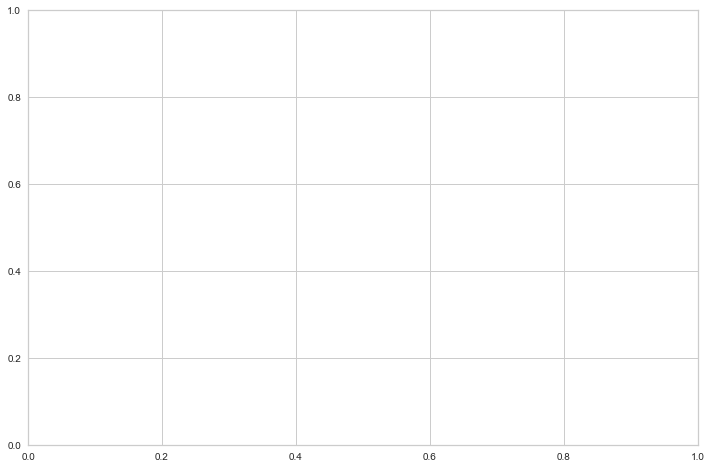

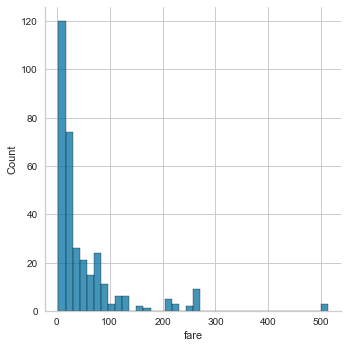

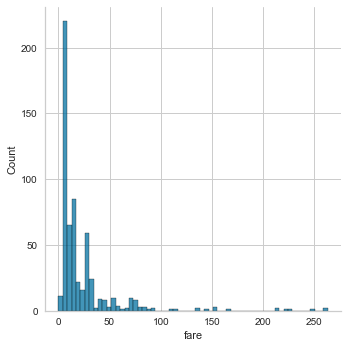

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
mask = y_train == 1
ax = sns.displot(X_train[mask].fare,  label='surived',facet_kws={'sharex': 'col'})
ax = sns.displot(X_train[~mask].fare, label='died',facet_kws={'sharex': 'col'})
#ax.set_xlim(-1.5, 1.5)
#ax.legend()